<h1>Random Forests</h1>

Notebook Goals

* Learn how to create a random forest model using scikit-learn
* Learn one way to tune a random forest model

<h2> What are random trees</h2> 

Each machine learning algorithm has strengths and weaknesses. Bagged tree models use many trees to protect individual decision trees from overfitting. However, bagged tree models are not without weaknesses. Suppose you have one very strong feature in a dataset, most of the trees will use that feature as the top split. This will result in many similar trees. You can think of Random forests as a variant of a bagged tree model. The difference is that each time a split is considered, only a portion of the total number of features are split candidates. In short, Random Forests make the decision trees less correlated.  

![images](images/randomForest.png)

<h2> Import Libraries</h2>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

## Load the Dataset
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h2>  Remove Missing or Impute Values </h2>
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [3]:
# Look at the shape of the dataframe
df.shape

(21613, 21)

In [4]:
# There is a missing value in the Length column which is a feature
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h2> Arrange Data into Features Matrix and Target Vector </h2>
Target is flower species

In [5]:
# This notebook only selects a couple features for simplicity
# However, I encourage you to play with adding and substracting more features
feature_names = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']

X = df.loc[:, feature_names]

y = df.loc[:, 'price'].values

<h2> Train Test Split </h2>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Note, another benefit of bagged trees like decision trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

<h2>Random Forests</h2>

In [7]:
rfr = RandomForestRegressor(n_estimators=100, 
                       random_state = 0)

# Training the model on the data, storing the information learned from the data
rfr.fit(X_train, y_train)

### Measure Model Performance
score = rfr.score(X_test, y_test)
print(score)

0.577684658845681


## Feature Importance
Random Forests give feature importance metrics. Like any metric, it isn't perfect. Here is some recommended reading: https://explained.ai/rf-importance/index.html. The reason why I mention this is that understanding how metrics work can help you if sometimes seems odd about your results .

In [9]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [10]:
importances

,feature,importance
2,sqft_living,0.670
3,sqft_lot,0.197
1,bathrooms,0.067
0,bedrooms,0.036
4,floors,0.030


<h2> Visualizing Individual Decision Trees from a Bagged Tree and Random Forest Model</h2>
The purpose of this section is to show you that both ensemble models are really comprised of many decision trees. It just isnt advisable as these are deep trees just grown differently. If we tried to visualize our very deep decision trees from the bagged trees and random forest models, we would have a problem. Thats why the code below is from random forest and bagged tree classifiers on the iris dataset. 

In [9]:
"""
# Get the first decision tree for bagged tree model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(btr.estimators_[0],
               feature_names = feature_names,
               filled = True);
"""

'\n# Get the first decision tree for bagged tree model\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)\ntree.plot_tree(btr.estimators_[0],\n               feature_names = feature_names,\n               filled = True);\n'

In [10]:
"""
# Get the first decision tree for a random forest model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfr.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);
"""

'\n# Get the first decision tree for a random forest model\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)\ntree.plot_tree(rfr.estimators_[0],\n               feature_names = data.feature_names, \n               class_names=data.target_names,\n               filled = True);\n'

In [11]:
# Load the Iris Dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [12]:
# Fir Bagged Tree Model
btc = BaggingClassifier(n_estimators=100, 
                        random_state = 1)

btc.fit(X_train, y_train)

# Fit Random Forest Model
rfc = RandomForestClassifier(n_estimators=100, random_state = 1)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

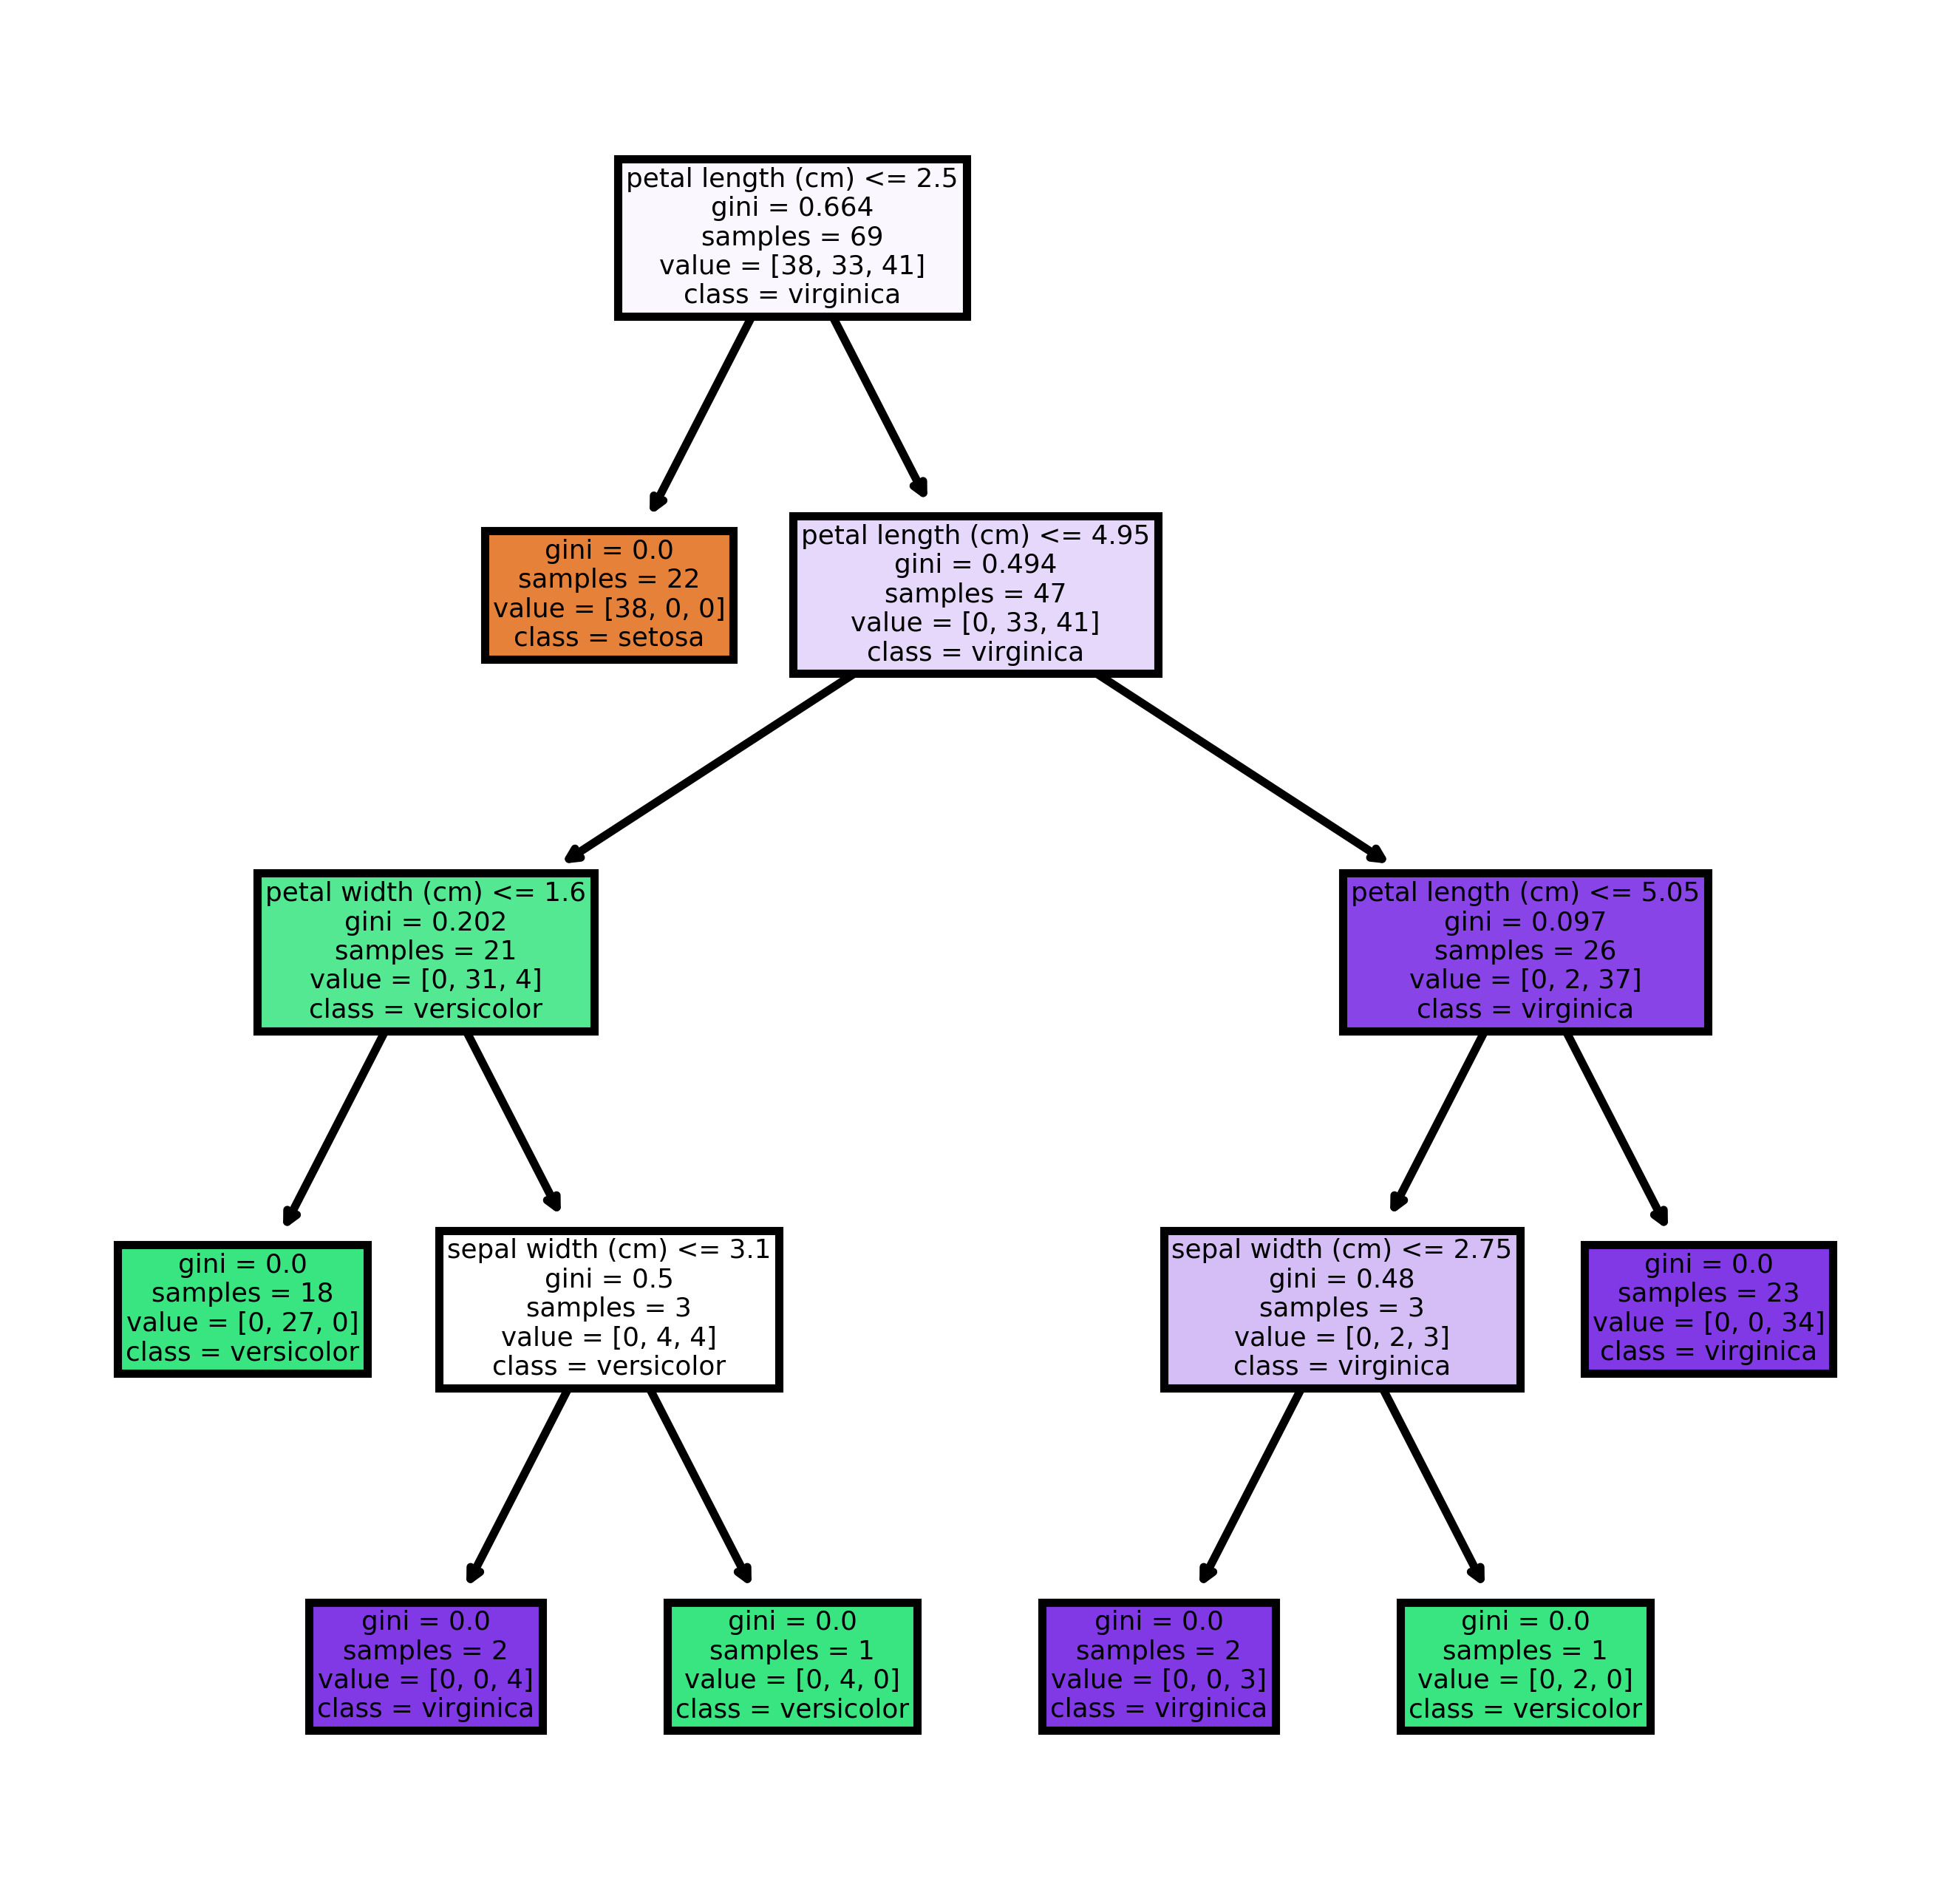

In [13]:
# Get the first decision tree for bagged tree model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(btc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

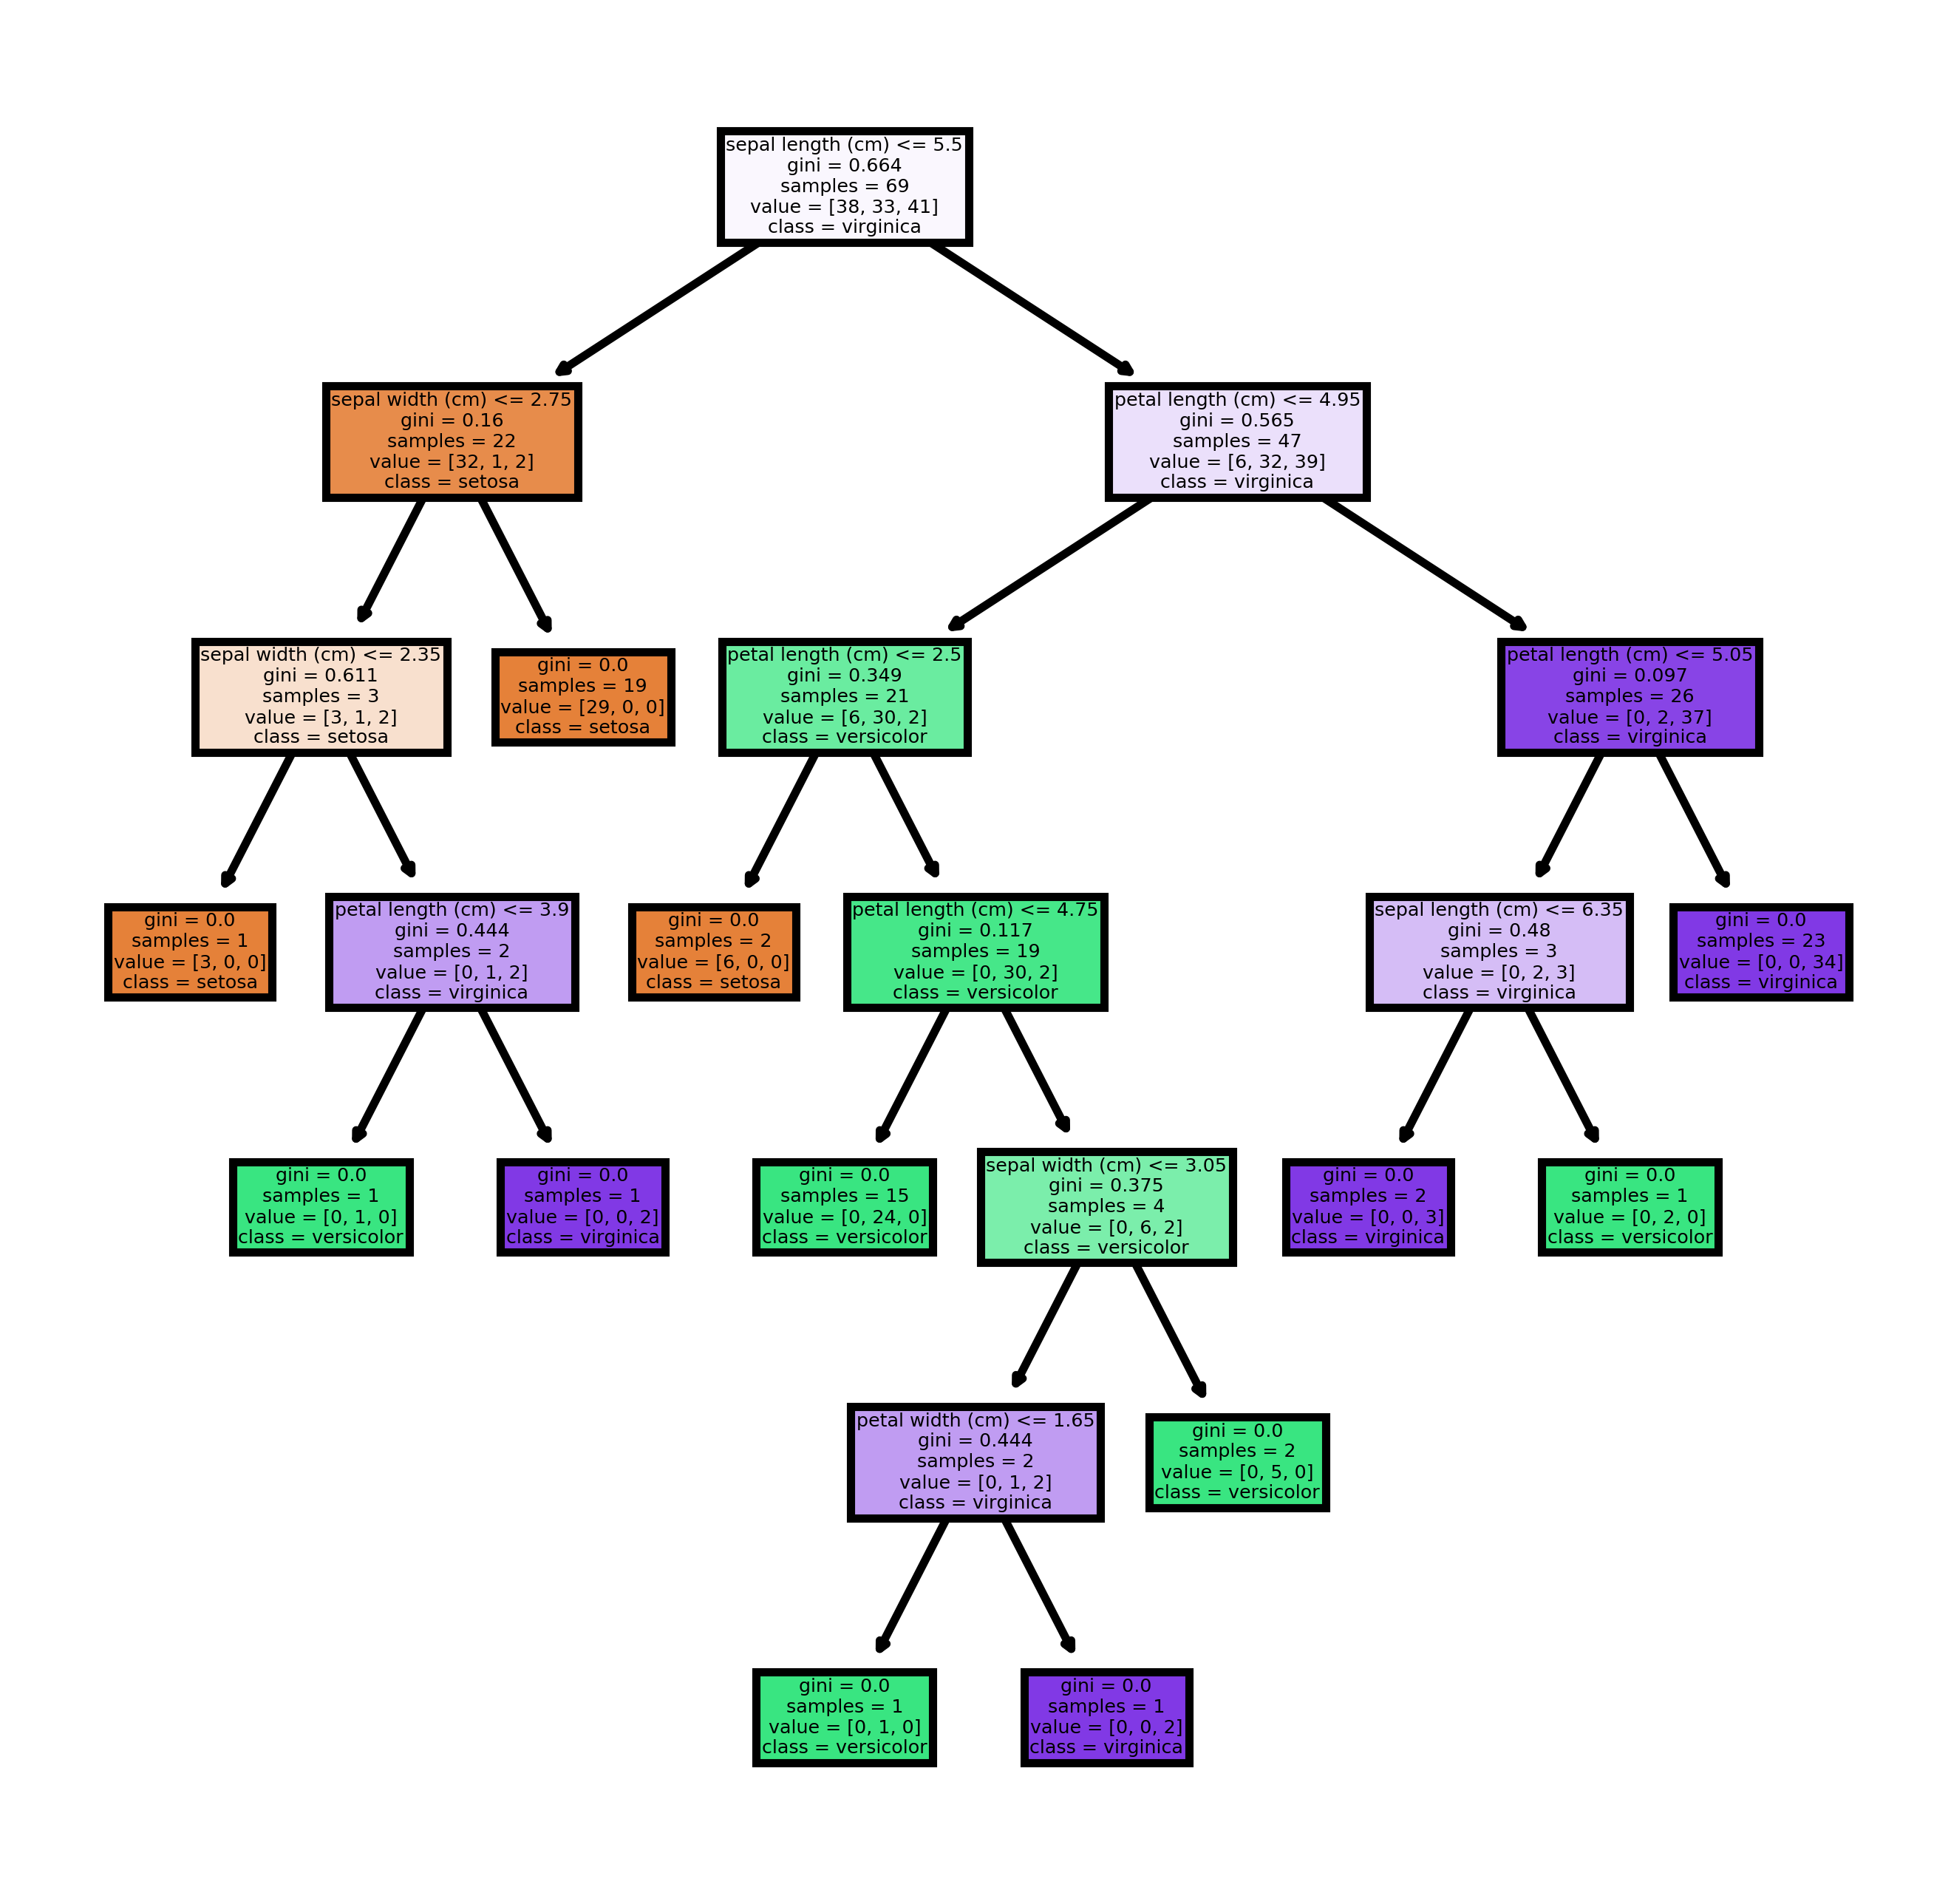

In [14]:
# Get the first decision tree for a random forest model
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = data.feature_names, 
               class_names=data.target_names,
               filled = True);

Notice that the score stops improving after a certain number of estimators (decision trees). One way to get a better score would be to include more features in the features matrix.

## Common questions

<h3>Does increasing the n_estimators parameter in random forests always increase accuracy</h3>
There is a very good stackoverflow link <a href="https://datascience.stackexchange.com/questions/19901/does-increasing-the-n-estimators-parameter-in-decision-trees-always-increase-acc">here</a>.



<h3>What are some disadvantages of random forests</h3>

* They are less interpretable than decision trees

* Slower to train as you have n_estimators

* They are slower to predict (marginally)

<h3>Which model is best</h3>

![images](images/ml_map.png)

With so many machine learning algorithms available from scikit-learn, which algorithm should you choose? Selecting a good enough model from among a large number of possible machine learning models is one of the hardest parts of machine learning. Some algorithms are better suited to different types of data and problems. Luckily, a quick answer to model selection with scikit-learn is, use the algorithm cheat sheet. It's meant to give you a rough guide in how to choose an algorithm. From the start point, you first ask, do you have more than 50 samples? From there, you keep on answering questions until you get an idea of what you should try. If you don't use the cheat sheet, here are a few things to consider when choosing a model. The first thing is a problem you're trying to solve. For example, if you have a supervised learning problem, figuring out if you're trying to predict a continuous or categorical value can be an important first step. Next, always consider the size, quality, and structure of your data. There's no machine learning without data. You should also consider the strengths and weaknesses of each algorithm you're considering. It's especially important, as some algorithms take longer to make predictions. Also, more complex models are often more difficult to maintain. Finally, consider the urgency of a task. Some models take longer to train and tune. 

<a href="https://peekaboo-vision.blogspot.com/2013/01/machine-learning-cheat-sheet-for-scikit.html">Interestingly, the author of the cheatsheet wrote a blog about a while back that is a good read.</a>